In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/praktikum_ml/praktikum07'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(path + '/data/apples_and_oranges.csv')
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle, os

In [ ]:
MODEL_OUT = path + "/svm_model.pkl"

In [ ]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [ ]:
X = df[["Weight", "Size"]] # Remove 'Class' from features
y = df["Class"]

In [ ]:
X.head()

,Weight,Class
0,69,orange
1,69,orange
2,65,orange
3,72,apple
4,67,orange


In [ ]:
y.head()

,Class
0,orange
1,orange
2,orange
3,apple
4,orange


In [ ]:
# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train_encoded)

SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test_encoded, y_pred) * 100:.2f}%")
# Laporan klasifikasi
print("Laporan Klasifikasi:\n", classification_report(y_test_encoded, y_pred))

Akurasi: 100.00%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8




Confusion Matrix:
 [[3 0]
 [0 5]]


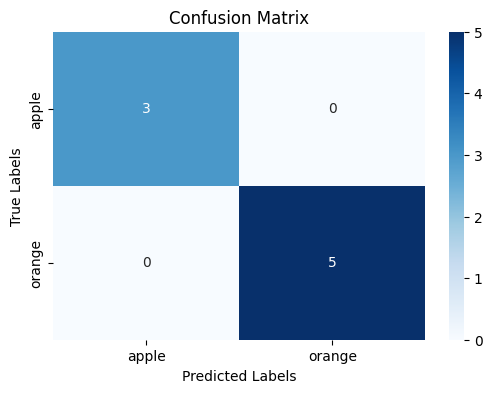

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
class_names = le.classes_
# misalnya: class_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

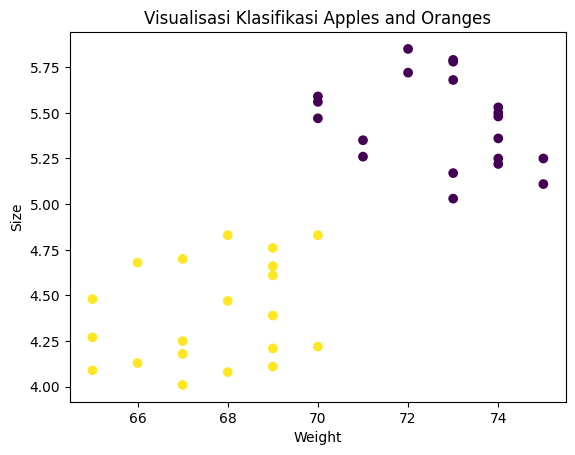

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Weight'], df['Size'], c=df['Class'].astype('category').cat.codes)
plt.xlabel('Weight')
plt.ylabel('Size')
plt.title('Visualisasi Klasifikasi Apples and Oranges')
plt.show()

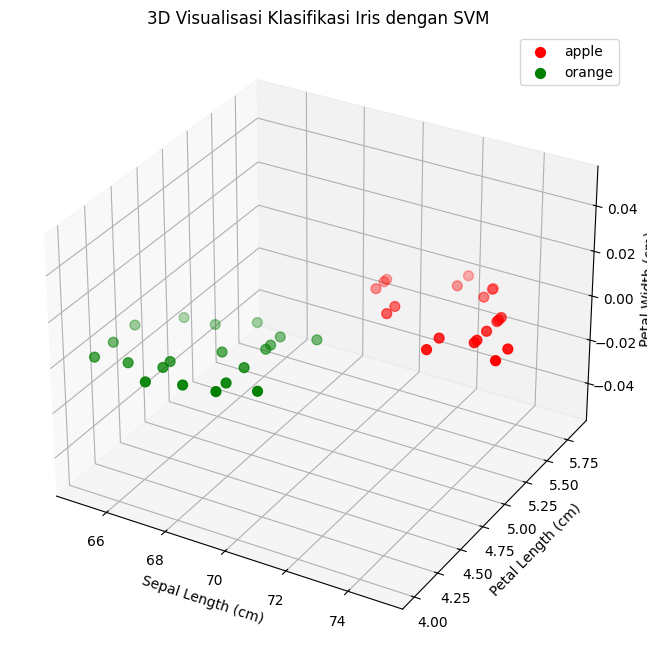

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# 3. Encode label (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Class'])

# 8. Plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['Weight'],
        subset ['Size'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()